In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams['figure.dpi'] = 200

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

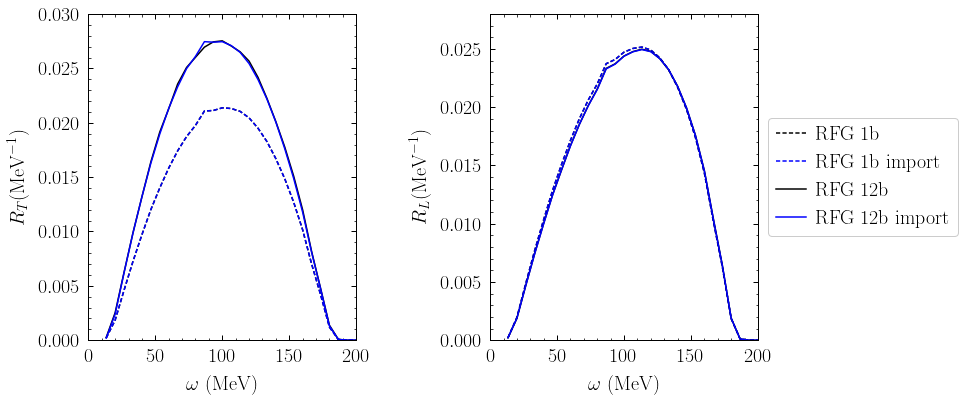

In [15]:
#(*Inputing MC predictions with form factor errors*)
#Grab prediction
pred_dir='/Users/noah/Desktop/Noah_interference/'

onebodyAle_df = pd.read_csv(pred_dir+'1b.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
onebodyAle_df.columns = ['w', 'rl', 'rt']

twobodyAle_df = pd.read_csv(pred_dir+'2b_Ale.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
twobodyAle_df.columns = ['w', 'rl', 'rt']

twobodyImport_df = pd.read_csv(pred_dir+'2b_import.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
twobodyImport_df.columns = ['w', 'rl', 'rt'] 

onebodyImport_df = pd.read_csv(pred_dir+'1b_import.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
onebodyImport_df.columns = ['w', 'rl', 'rt'] 

fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplots_adjust(wspace=0.5)

ax[0].plot(onebodyAle_df['w'], onebodyAle_df['rt'], label = 'RFG 1b',color='black',linestyle='dashed')
ax[0].plot(twobodyAle_df['w'], twobodyAle_df['rt'] + onebodyAle_df['rt'], label = 'RFG 12b',color='black')
ax[0].plot(twobodyImport_df['w'], twobodyImport_df['rt'] + onebodyImport_df['rt'], label = 'RFG 12b import', color='blue')
ax[0].plot(onebodyImport_df['w'], onebodyImport_df['rt'], label = 'RFG 1b import', color='blue',linestyle='dashed')
ax[0].set_xlim(0,200)
ax[0].set_ylim(0,.03)

ax[1].plot(onebodyAle_df['w'], onebodyAle_df['rl'], label = 'RFG 1b',color='black',linestyle='dashed')
ax[1].plot(onebodyImport_df['w'], onebodyImport_df['rl'], label = 'RFG 1b import', color='blue',linestyle='dashed')
ax[1].plot(twobodyAle_df['w'], twobodyAle_df['rl'] + onebodyAle_df['rl'], label = 'RFG 12b',color='black')
ax[1].plot(twobodyImport_df['w'], twobodyImport_df['rl'] + onebodyAle_df['rl'], label = 'RFG 12b import', color='blue')
ax[1].set_xlim(0,200)
ax[1].set_ylim(0,.028)

ax[0].set_xlabel(r'$\omega$ (MeV)')
ax[0].set_ylabel(r'$R_{T} (\rm{MeV}^{-1})$')
ax[1].set_xlabel(r'$\omega$ (MeV)')
ax[1].set_ylabel(r'$R_{L} (\rm{MeV}^{-1})$')

#ax[0].legend()
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('12b.png',facecolor='white',bbox_inches='tight', dpi=300)
    


In [5]:
import uproot 
data_file = uproot.open("/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/Plotting/Validation_backup.root")
experiments = data_file["expxsectree"]
branches = experiments.arrays()

In [35]:
lowenergies = (branches['E_lepton'] > 0.5)
highenergies = (branches['E_lepton'] < 3.5)
myZ = (branches['Z'] == 6)
Energies = np.unique(branches['E_lepton'][lowenergies & highenergies & myZ])
num_plots = 0
for e in Energies:
    print(e,np.unique(branches['theta_lepton'][branches['E_lepton'] == e]))

0.519 [60]
0.56 [36, 60, 145]
0.62 [36, 60]
0.68 [36, 60]
0.73 [37.1]
0.961 [37.5]
1.108 [37.5]
1.299 [37.5]
1.3 [11.9, 13.5]
1.5 [11.9, 13.5]
1.501 [37.5]
1.65 [11.9, 13.5]
1.93 [16, 18]
2.0 [15]
2.015 [35.5]
2.02 [15, 20]
2.13 [16, 18]
2.5 [12, 15]
2.7 [13.8, 15]
3.188 [47.7]


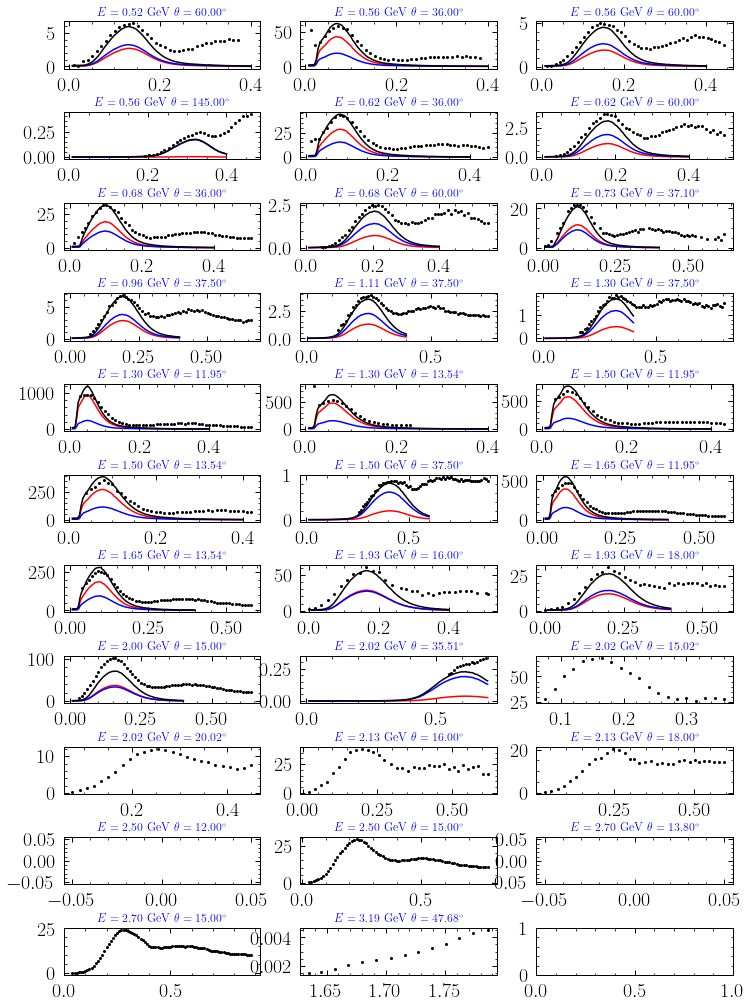

In [70]:
fig,ax = plt.subplots(11,3,figsize=(10,14))
ax = ax.flatten()
fig.tight_layout()

pred_path = '/Users/noah/Physics/Fermilab/Interference/'
pred_files = ['C12_QMC_EM_1b_519_60p0.out','C12_QMC_EM_1b_560_36p0.out','C12_QMC_EM_1b_560_60p0.out','C12_QMC_EM_1b_560_145p0.out','C12_QMC_EM_1b_620_36p0.out','C12_QMC_EM_1b_620_60p0.out','C12_QMC_EM_1b_680_36p0.out','C12_QMC_EM_1b_680_60p0.out','C12_QMC_EM_1b_730_37p1.out','C12_QMC_EM_1b_961_37p5.out', 'C12_QMC_EM_1b_1108_37p5.out','C12_QMC_EM_1b_1299_37p5.out','C12_QMC_EM_1b_1300_11p9.out','C12_QMC_EM_1b_1300_13p5.out','C12_QMC_EM_1b_1500_11p9.out','C12_QMC_EM_1b_1500_13p5.out','C12_QMC_EM_1b_1501_37p5.out','C12_QMC_EM_1b_1650_11p9.out','C12_QMC_EM_1b_1650_13p5.out','C12_QMC_EM_1b_1930_16p0.out','C12_QMC_EM_1b_1930_18p0.out','C12_QMC_EM_1b_2000_15p0.out','C12_QMC_EM_1b_2015_35p5.out']

pred_df = [pd.read_csv(pred_path+file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for file in pred_files]

for df in pred_df:
    df.columns = ['w', 'l','t']

p = 0
for e in Energies:
    thetas = np.unique(branches['theta_lepton'][branches['E_lepton'] == e])
    for theta in thetas:
        if p < len(pred_files):
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['l']/1000,color='red')
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['t']/1000,color='blue')
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['l']/1000 + pred_df[p]['t']/1000,color='black')
        #print('e = ',e, ' and theta = ', theta)
        masks = myZ & (branches['theta_lepton'] == theta) & (branches['E_lepton'] == e)
        ax[p].errorbar( branches['E_trans'][masks], branches['dsigma'][masks]/1000, fmt='o',color='black', markersize=2)#, yerr=np.sqrt(branches['syserror'][masks]**2 + branches['randomerror'][masks]**2)/1000,label='Exp', barsabove=True,capsize=3)
        #ax[p].spines['right'].set_visible(False)
        #ax[p].spines['top'].set_visible(False)
        #ax[p].get_xaxis().tick_bottom()
        #ax[p].get_yaxis().tick_left()
        ax[p].set_title(r'$E={:.2f}$ GeV $\theta={:.2f}^\circ$'.format(e,theta),color='blue')
        p += 1
plt.savefig('inclusive_scan.png',facecolor='white',bbox_inches='tight', dpi=300)       

(0.0, 7.5)

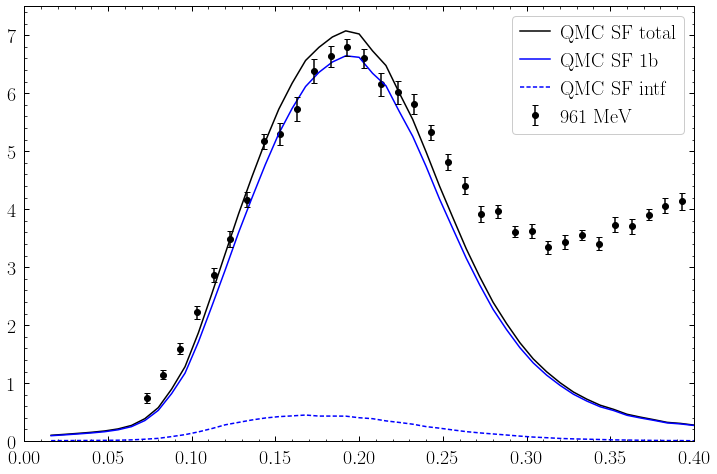

In [44]:
fig,ax = plt.subplots(figsize=(12,8))

pred_path = '/Users/noah/Physics/Fermilab/Interference/'
pred_files = [pred_path+'C12_QMC_FSI_EM_1b_961_37p5.out',pred_path+'C12_QMC_FSI_EM_2b_961_37p5.out']

pred_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in pred_files ]
for pred in pred_df:
    pred.columns = ['w', '1b','2b']

mask961 = (branches['Z'] == 6) & (branches['theta_lepton'] == 37.5) & (branches['E_lepton'] == 0.961)

#mask1108 = (branches['Z'] == 6) & (branches['theta_lepton'] == 37.5) & (branches['E_lepton'] == 1.108)

#ax.plot(pred_df[0]['w']/1000, pred_df[0]['l']/1000 + pred_df[0]['t']/1000,color='black',label='CBF SF')
ax.plot(pred_df[0]['w']/1000, pred_df[0]['1b']/1000 + pred_df[1]['2b']/1000,color='black',label='QMC SF total')
ax.plot(pred_df[0]['w']/1000, pred_df[0]['1b']/1000 ,color='blue',label='QMC SF 1b')
ax.plot(pred_df[0]['w']/1000, pred_df[1]['2b']/1000 ,color='blue',linestyle='dashed',label='QMC SF intf')

ax.errorbar( branches['E_trans'][mask961], branches['dsigma'][mask961]/1000, fmt='o',color='black', yerr=np.sqrt(branches['syserror'][mask961]**2 + branches['randomerror'][mask961]**2)/1000,label='961 MeV', barsabove=True,capsize=3)
#ax.errorbar( branches['E_trans'][mask1108], branches['dsigma'][mask1108]/1000, fmt='o',color='blue', yerr=np.sqrt(branches['syserror'][mask1108]**2 + branches['randomerror'][mask1108]**2)/1000,label='1108 MeV', barsabove=True,capsize=3)

ax.legend()

ax.set_xlim([0,.4])
ax.set_ylim([0,7.5])


In [6]:
MEC_path = "/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/src/Original/"

MECfiles = [MEC_path+"MEC_results/C12_620_60_2b_FSI2_harry_full_v3.out", MEC_path+"MEC_results/2b_730_37p5.out", MEC_path+"MEC_results/C12_1108_37p5_2b_FSI2_harry_full_v3.out"]

MEC_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in MECfiles]
for df in MEC_df:
    df.columns = ["w", "dsigma", "dsigma_err"]
    df['w'] = df['w']/1000
    df['dsigma'] = df['dsigma']/1000
    
QE_path = '/Users/noah/Physics/Fermilab/Interference/EM_Scattering/Inclusive_Scan/'
QE_files = [QE_path+'C12_QMC_FSI_EM_1b_CC_620_60p0.out',QE_path+'C12_QMC_FSI_EM_1b_CC_730_37p1.out', QE_path+'C12_QMC_FSI_EM_1b_CC_1108_37p5.out']

intf_files = [QE_path+'C12_QMC_FSI_EM_2b_CC_620_60p0.out',QE_path+'C12_QMC_FSI_EM_2b_CC_730_37p1.out', QE_path+'C12_QMC_FSI_EM_2b_CC_1108_37p5.out']

QE_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in QE_files ]
for pred in QE_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']/1000
    pred['1b'] = pred['1b']/1000

intf_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in intf_files ]
for pred in intf_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']/1000
    pred['2b'] = pred['2b']/1000   
    
myEnergy3 = (branches['E_lepton'] == 1.108)
myAngle3 = (branches['theta_lepton'] == 37.5)
    
myEnergy2 = (branches['E_lepton'] == 0.730)
myAngle2 = (branches['theta_lepton'] == 37.1)

myEnergy1 = (branches['E_lepton'] == .620)
myAngle1 = (branches['theta_lepton'] == 60.0)

myZ = (branches['Z'] == 6)

masks = [myEnergy1 & myAngle1 & myZ, myEnergy2 & myAngle2 & myZ, myEnergy3 & myAngle3 & myZ]

    
# We have to interpolate the MEC cross sections
# because they were computed with slightly different binning
# Not a big effect
MEC_xsec_interp = [0,0,0]
MEC_xsec_interp[0] = np.interp(QE_df[0]['w'], MEC_df[0]['w'], MEC_df[0]['dsigma'])
MEC_xsec_interp[1] = np.interp(QE_df[1]['w'], MEC_df[1]['w'], MEC_df[1]['dsigma'])
MEC_xsec_interp[2] = np.interp(QE_df[2]['w'], MEC_df[2]['w'], MEC_df[2]['dsigma'])

GFMC_path = "/Users/noah/Physics/Fermilab/MINERvA_fluxfolding/fluxfolded_src/GFMC_electrons/"

GFMC_new_files = [GFMC_path+"620_60p0_GFMC.txt", GFMC_path+"730_37p1_GFMC.txt"]
GFMC_new_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_new_files]

GFMC_new_df[0].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]
GFMC_new_df[1].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]

GFMC_new_files_rel = [GFMC_path+"620_60p0_GFMC_rel.txt", GFMC_path+"730_37p1_GFMC_rel.txt"]
GFMC_new_rel_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_new_files_rel]

GFMC_new_rel_df[0].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]
GFMC_new_rel_df[1].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]

Text(0.075, 0.5, "$\\rm{d}\\sigma/d\\Omega_{e'}dE_{e'}$ [nb/sr MeV]")

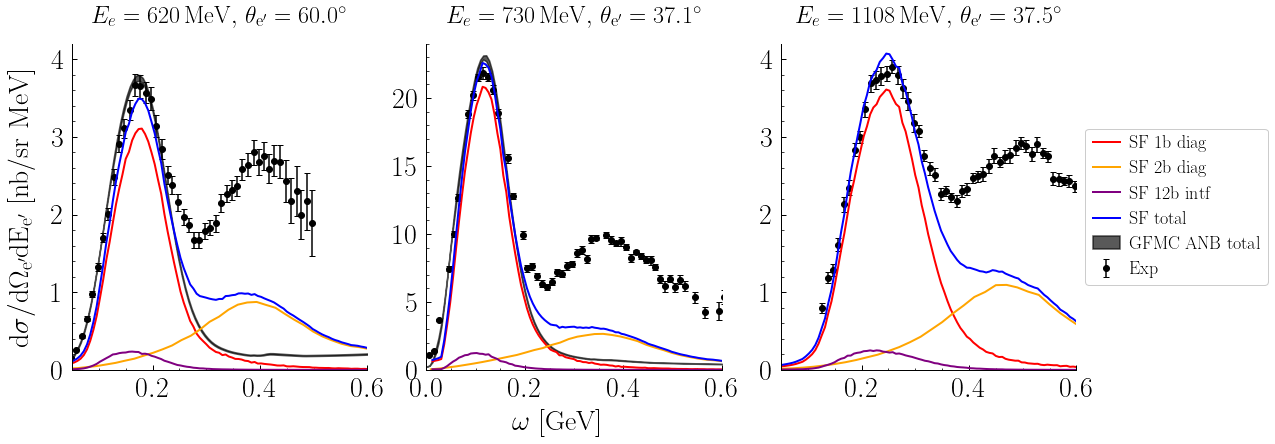

In [7]:
fig,ax = plt.subplots(1,3,figsize=(18, 6))

ax = ax.flatten()

for i in range(0,3):
    ax[i].errorbar((branches['E_trans'][masks[i]]), (branches['dsigma'][masks[i]])/1000, yerr=np.sqrt(branches['syserror'][masks[i]]**2 + branches['randomerror'][masks[i]]**2)/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)

    ax[i].plot(QE_df[i]['w'], QE_df[i]['1b'], color='red', label = 'SF 1b diag', linewidth=2.0)
    ax[i].plot(MEC_df[i]['w'], MEC_df[i]['dsigma'], color='orange', linestyle='solid', label = 'SF 2b diag',linewidth=2.0)
    #ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'], color='violet', label = 'SF 1b + 2b diag',linewidth=2.0)
    ax[i].plot(intf_df[i]['w'], intf_df[i]['2b'], color='purple', linestyle='solid', label = 'SF 12b intf',linewidth=2.0)
    ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'] + intf_df[i]['2b'], color='blue', label = 'SF total',linewidth=2.0)
    #ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'], color='green', label = 'SF 1b + 2b',linewidth=2.0)
    
    if i < 2:
        ax[i].fill_between(GFMC_new_rel_df[i]["E_trans"].values/1000, 1e6*GFMC_new_rel_df[i]["12b_min"].values, 1e6*GFMC_new_rel_df[i-2]["12b_max"].values, color='black', alpha = 0.65,label='GFMC ANB total',linewidth=1.5)
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    
    
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)
    
    
    ax[i].set_xlim([0,.6])
    ax[i].set_ylim([0,4.2])
    
ax[2].fill_between([], [], [], color='black', alpha = 0.65,label='GFMC ANB total',linewidth=1.5)
        
ax[1].set_ylim([0,24])    
    
ax[0].set_xlim([0.05,.6])
ax[1].set_xlim([0,.6])
ax[2].set_xlim([0.05,.6])    
ax[0].set_title(r"$E_{e}= 620\,\rm{MeV},\, \theta_{e'}=60.0^\circ$",fontsize=24, pad=20)
ax[1].set_title(r"$E_{e}= 730\,\rm{MeV},\, \theta_{e'}=37.1^\circ$",fontsize=24, pad=20)
ax[2].set_title(r"$E_{e}= 1108\,\rm{MeV},\, \theta_{e'}=37.5^\circ$",fontsize=24, pad=20)
    
ax[2].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})




fig.supxlabel(r"$\omega$ [GeV]",fontsize=28,y=-0.03)
fig.supylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black', x =0.075)
#plt.savefig('Electron_scattering_QE_int_MEC.png',facecolor='white',bbox_inches='tight', dpi=300)

In [2]:
path = '/Users/noah/Physics/Fermilab/Interference/EM_Scattering/'

QE_df = pd.read_csv(path+'C12_QMC_FSI_EM_1b_CC_resp_q570.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_df = pd.read_csv(path+'C12_QMC_FSI_EM_2b_CC_resp_q570.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
MEC_RL_df = pd.read_csv(path+'C12_MEC_resp_570_RL.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
MEC_RT_df = pd.read_csv(path+'C12_MEC_resp_570_RT.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [MEC_RL_df,MEC_RT_df]:
    df.columns = ["w", "R"]

QE_df.columns = ["w", "RL", "RT"]

Intf_df.columns = ["w", "RL", "RT"]

data_RL_df = pd.read_csv('/Users/noah/Downloads/data/c12_q570_L.dat',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
data_RT_df = pd.read_csv('/Users/noah/Downloads/data/c12_q570_T.dat',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [data_RL_df, data_RT_df]:
    df.columns = ["w", "R", "err"]


MEC_RL_interp = np.interp(QE_df['w'], MEC_RL_df['w'], MEC_RL_df['R'])
MEC_RT_interp = np.interp(QE_df['w'], MEC_RT_df['w'], MEC_RT_df['R'])
    


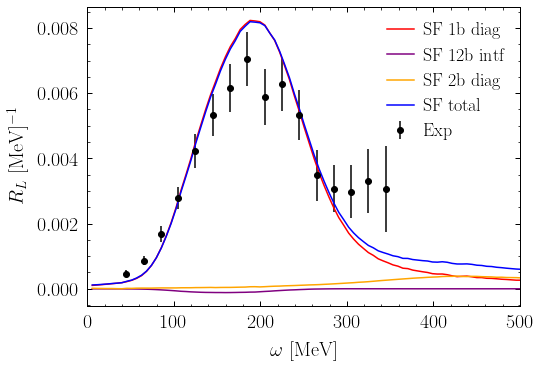

In [19]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)

ax.errorbar(data_RL_df['w'], data_RL_df['R'], yerr = data_RL_df['err'], fmt='o',color='black',label='Exp')
ax.plot(QE_df['w'], QE_df['RL'], color='red', label='SF 1b diag')
ax.plot(Intf_df['w'], Intf_df['RL'], color='purple', label='SF 12b intf')
ax.plot(QE_df['w'], MEC_RL_interp, color='orange', label='SF 2b diag')
ax.plot(QE_df['w'], QE_df['RL'] + Intf_df['RL'] + MEC_RL_interp, color='blue', label='SF total')

ax.set_xlim([0,500])

ax.set(ylabel=r'$R_{L}$ [MeV]$^{-1}$')
ax.set(xlabel=r"$\omega$ [MeV]")

ax.legend(prop={'size': 18},frameon=False)


plt.savefig('RL_q570.png',facecolor='white',bbox_inches='tight', dpi=300)


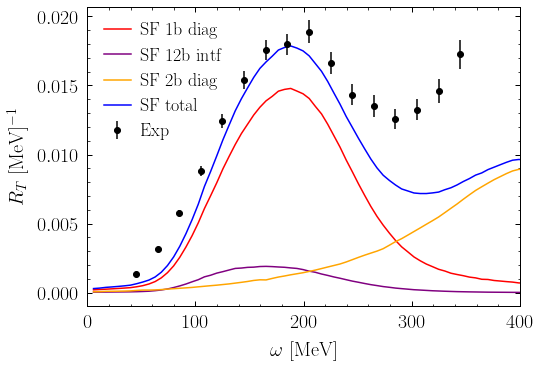

In [20]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)

ax.errorbar(data_RT_df['w'], data_RT_df['R'], yerr = data_RT_df['err'], fmt='o',color='black',label='Exp')
ax.plot(QE_df['w'], QE_df['RT'], color='red', label='SF 1b diag')
ax.plot(Intf_df['w'], Intf_df['RT'], color='purple', label='SF 12b intf')
ax.plot(QE_df['w'], MEC_RT_interp, color='orange', label='SF 2b diag')
ax.plot(QE_df['w'], QE_df['RT'] + Intf_df['RT'] + MEC_RT_interp, color='blue', label='SF total')

ax.set_xlim([0,400])

ax.set(ylabel=r'$R_{T}$ [MeV]$^{-1}$')

#ax.legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})
ax.legend(prop={'size': 18},frameon=False)

ax.set(xlabel=r"$\omega$ [MeV]")

plt.savefig('RT_q570.png',facecolor='white',bbox_inches='tight', dpi=300)

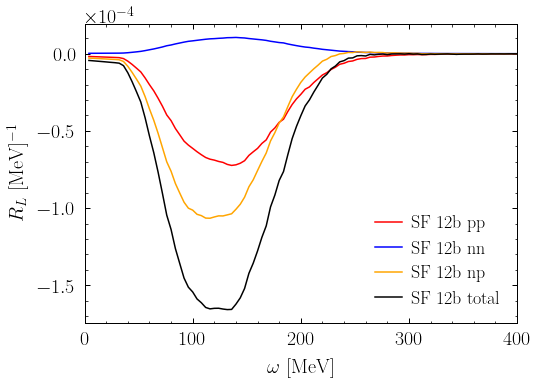

In [7]:
path = '/Users/noah/Physics/Fermilab/Interference/EM_Responses/Isospin_Responses/'

Intf_pn_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pn.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_pp_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pp.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_nn_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_nn.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_np_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_np.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')


for df in [Intf_pn_df, Intf_pp_df, Intf_nn_df, Intf_np_df]:
    df.columns = ["w", "RL", "RT"]

fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)

ax.plot(Intf_pn_df['w'], Intf_pp_df['RL'], color='red', label='SF 12b pp')
ax.plot(Intf_pn_df['w'], Intf_nn_df['RL'], color='blue', label='SF 12b nn')
ax.plot(Intf_pn_df['w'], Intf_np_df['RL'] + Intf_pn_df['RL'], color='orange', label='SF 12b np')
ax.plot(Intf_pn_df['w'], Intf_pn_df['RL'] + Intf_pp_df['RL'] +Intf_nn_df['RL'] +Intf_np_df['RL'], color='black', label='SF 12b total')

ax.set_xlim([0,400])

ax.set(ylabel=r'$R_{L}$ [MeV]$^{-1}$')
ax.set(xlabel=r"$\omega$ [MeV]")

ax.legend(frameon=False, prop={'size': 18})

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#plt.savefig('RL_q500_isospin.png',facecolor='white',bbox_inches='tight', dpi=300)

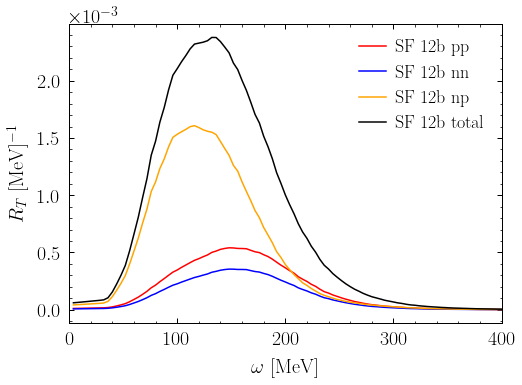

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)

ax.plot(Intf_pn_df['w'], Intf_pp_df['RT'], color='red', label='SF 12b pp')
ax.plot(Intf_pn_df['w'], Intf_nn_df['RT'], color='blue', label='SF 12b nn')
ax.plot(Intf_pn_df['w'], Intf_np_df['RT'] + Intf_pn_df['RT'], color='orange', label='SF 12b np')
ax.plot(Intf_pn_df['w'], Intf_pn_df['RT'] + Intf_pp_df['RT'] +Intf_nn_df['RT'] +Intf_np_df['RT'], color='black', label='SF 12b total')

ax.set_xlim([0,400])

ax.set(ylabel=r'$R_{T}$ [MeV]$^{-1}$')

ax.legend(prop={'size': 18},frameon=False)

ax.set(xlabel=r"$\omega$ [MeV]")

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#plt.savefig('RT_q500_isospin.png',facecolor='white',bbox_inches='tight', dpi=300)

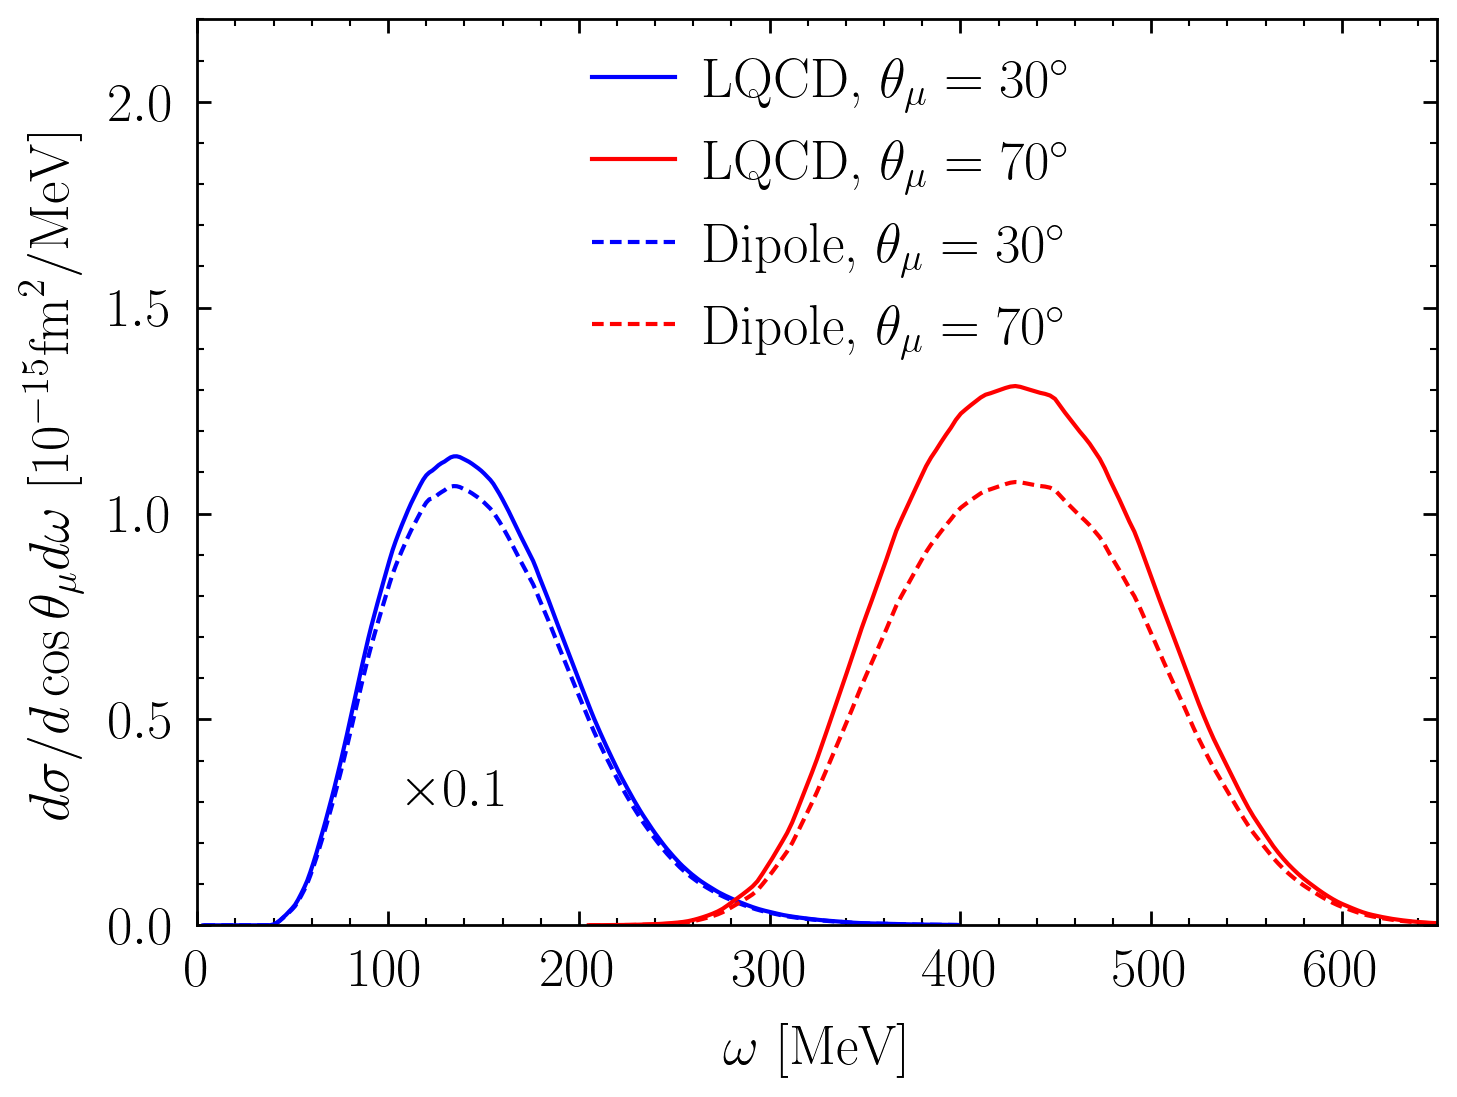

In [52]:
    
QE_path = '/Users/noah/Physics/Fermilab/Interference/EW_Scattering/'
dipole_files = [QE_path+'C12_QMC_dipole_EW_v2_2b_1000_30p0.out',QE_path+'C12_QMC_dipole_EW_v2_2b_1000_70p0.out']

lattice_files = [QE_path+'C12_QMC_lattice_EW_v2_2b_1000_30p0.out',QE_path+'C12_QMC_lattice_EW_v2_2b_1000_70p0.out']

#dipole_label = [r'$E_{\nu} = 600,\rm{MeV}, \theta_{\mu} = 60^{circ}$']
#dipole_label = [r'$E_{\nu} = 600,\rm{MeV}, \theta_{\mu} = 60^{circ}$']
#dipole_label = [r'$E_{\nu} = 600,\rm{MeV}, \theta_{\mu} = 60^{circ}$']

dipole_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in dipole_files ]
lattice_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in lattice_files ]

for pred in dipole_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']
    pred['1b'] = pred['1b']/1000
    
    
for pred in lattice_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']
    pred['1b'] = pred['1b']/1000
    

    
fig,ax = plt.subplots(1,1,figsize=(8,6))

colors = ['blue','red']

div_factor = [10.6,1]

#I have to smooth out some of the QE predictions because the sampling gave a very noisy prediction for some reason
maxbin = [248,248]
fracparam = [.06,.06]

omega_dipole_interp= [0,0]
intf_dipole_interp = [0,0]
for i,df in enumerate(dipole_df):
    interp = sm.nonparametric.lowess(df['2b'][:maxbin[i]], df['w'][:maxbin[i]],frac = fracparam[i])
    omega_dipole_interp[i] = interp[:,0][:maxbin[i]]
    intf_dipole_interp[i] = interp[:,1][:maxbin[i]]
    
omega_lattice_interp= [0,0]
intf_lattice_interp = [0,0]
for i,df in enumerate(lattice_df):
    interp = sm.nonparametric.lowess(df['2b'][:maxbin[i]], df['w'][:maxbin[i]],frac = fracparam[i])
    omega_lattice_interp[i] = interp[:,0][:maxbin[i]]
    intf_lattice_interp[i] = interp[:,1][:maxbin[i]]    

for i in range(0,2):
    ax.plot(omega_dipole_interp[i], intf_dipole_interp[i]/div_factor[i], color =colors[i],linestyle='--')
    ax.plot(omega_lattice_interp[i], intf_lattice_interp[i]/div_factor[i], color = colors[i])
    
ax.plot([],[],color='blue', label=r'LQCD, $\theta_{\mu} = 30^{\circ}$')
ax.plot([],[],color='red', label=r'LQCD, $\theta_{\mu} = 70^{\circ}$')
ax.plot([],[],color='blue',linestyle='--', label=r'Dipole, $\theta_{\mu} = 30^{\circ}$')
ax.plot([],[],color='red',linestyle='--', label=r'Dipole, $\theta_{\mu} = 70^{\circ}$')

ax.set_ylim([0,2.2])
ax.set_xlim([0,650])

ax.text(110,0.3, r'$\times 0.1$',fontsize=20)
   
#ax.set_yscale('log') 
ax.set(ylabel=r'$d\sigma/d\cos\theta_{\mu}d\omega$ $[10^{-15}\rm{fm}^{2}/\rm{MeV}]$')
ax.set(xlabel=r'$\omega$ [MeV]')
    
ax.legend(frameon=False,loc=(0.30, 0.6))


plt.savefig('FA_fixed_kinematics.png',facecolor='white',bbox_inches='tight', dpi=300)

In [68]:
from scipy import signal as signal

dipole_30_peak,_ = signal.find_peaks(intf_dipole_interp[0])
dipole_70_peak,_ = signal.find_peaks(intf_dipole_interp[1])
lattice_30_peak,_ = signal.find_peaks(intf_lattice_interp[0])
lattice_70_peak,_ = signal.find_peaks(intf_lattice_interp[1])

#print('30 degree dipole peak = ', intf_dipole_interp[0][dipole_30_peak[0]])
#print('70 degree dipole peak = ', intf_dipole_interp[1][dipole_70_peak[0]])
#print('30 degree lattice peak = ', intf_lattice_interp[0][lattice_30_peak[0]])
#print('70 degree lattice peak = ', intf_lattice_interp[1][lattice_70_peak[0]])

print('Ratio of lattice to dipole peak @ 30 degrees = ', intf_lattice_interp[0][lattice_30_peak[0]]/intf_dipole_interp[0][dipole_30_peak[0]])
print('Ratio of lattice to dipole peak @ 70 degrees = ', intf_lattice_interp[1][lattice_70_peak[0]]/intf_dipole_interp[1][dipole_70_peak[0]])

Ratio of lattice to dipole peak @ 30 degrees =  1.067831947802408
Ratio of lattice to dipole peak @ 70 degrees =  1.2165282841647802


In [71]:
from scipy import integrate
dipole_int = [0,0]
lattice_int = [0,0]
for i in range(0,2):
    dipole_int[i] = integrate.cumtrapz(dipole_df[i]['2b'],dipole_df[i]['w'])
    lattice_int[i] = integrate.cumtrapz(lattice_df[i]['2b'],lattice_df[i]['w'])
    
print('Ratio fo lattice xsec to dipole xsec @ 30 degrees = ', lattice_int[0][-1]/dipole_int[0][-1])
print('Ratio fo lattice xsec to dipole xsec @ 70 degrees = ', lattice_int[1][-1]/dipole_int[1][-1])

Ratio fo lattice xsec to dipole xsec @ 30 degrees =  1.0685509993658968
Ratio fo lattice xsec to dipole xsec @ 70 degrees =  1.214230873672666


In [3]:
GFMC_path = "/Users/noah/Physics/Fermilab/MINERvA_fluxfolding/fluxfolded_src/GFMC_electrons/"

GFMC_new_files = [GFMC_path+"620_60p0_GFMC.txt", GFMC_path+"730_37p1_GFMC.txt"]
GFMC_new_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_new_files]

GFMC_new_df[0].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]
GFMC_new_df[1].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]

GFMC_new_files_rel = [GFMC_path+"620_60p0_GFMC_rel.txt", GFMC_path+"730_37p1_GFMC_rel.txt"]
GFMC_new_rel_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_new_files_rel]

GFMC_new_rel_df[0].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]
GFMC_new_rel_df[1].columns = ["E_trans", "1b_min", "1b_max", "1b_mean", "12b_min", "12b_max", "12b_mean"]

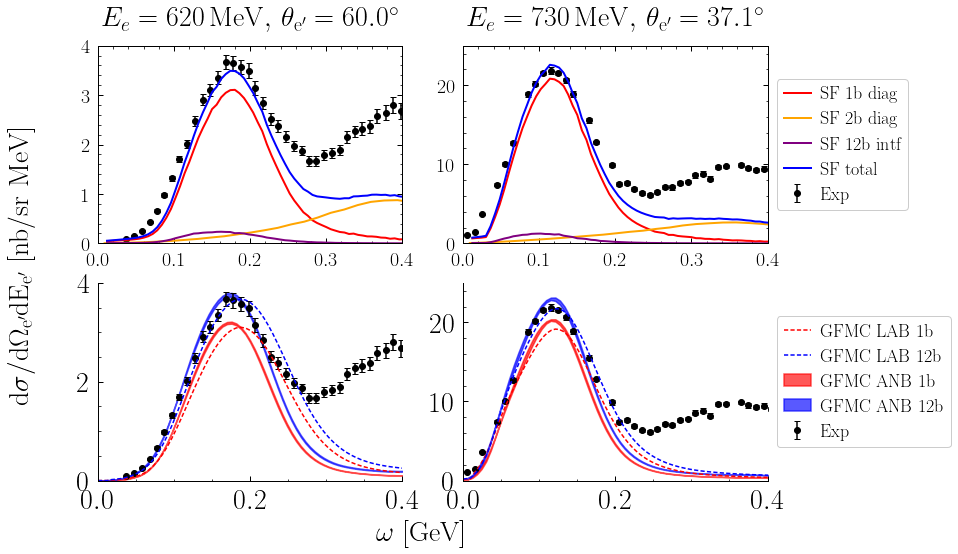

In [11]:
fig,ax = plt.subplots(2,2,figsize=(12, 8))

exp_labels = ['Barreau:1983ht', 'Sealock:1989nx']
Energy = [620, 730]
Angle = [60.0,37.5]

ax = ax.flatten()
for i in range(0,2):
    ax[i].errorbar((branches['E_trans'][masks[i]]), (branches['dsigma'][masks[i]])/1000, yerr=(branches['syserror'][masks[i]] + branches['randomerror'][masks[i]])/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)

    ax[i].plot(QE_df[i]['w'], QE_df[i]['1b'], color='red', label = 'SF 1b diag', linewidth=2.0)
    ax[i].plot(MEC_df[i]['w'], MEC_df[i]['dsigma'], color='orange', linestyle='solid', label = 'SF 2b diag',linewidth=2.0)
    ax[i].plot(intf_df[i]['w'], intf_df[i]['2b'], color='purple', linestyle='solid', label = 'SF 12b intf',linewidth=2.0)
    ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'] + intf_df[i]['2b'], color='blue', label = 'SF total',linewidth=2.0)
    
    
for i in range(2,4):
    ax[i].errorbar((branches['E_trans'][masks[i-2]]), (branches['dsigma'][masks[i-2]])/1000, yerr=(branches['syserror'][masks[i-2]] + branches['randomerror'][masks[i-2]])/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)
    
 
    ax[i].plot(GFMC_new_df[i-2]["E_trans"].values/1000, 1e6*GFMC_new_df[i-2]["1b_mean"].values, color='red',linestyle='dashed',label='GFMC LAB 1b',linewidth=1.5)
    ax[i].plot(GFMC_new_df[i-2]["E_trans"].values/1000, 1e6*GFMC_new_df[i-2]["12b_mean"].values, color='blue', linestyle='dashed',label='GFMC LAB  12b',linewidth=1.5)
    
    ax[i].fill_between(GFMC_new_rel_df[i-2]["E_trans"].values/1000, 1e6*GFMC_new_rel_df[i-2]["1b_min"].values, 1e6*GFMC_new_rel_df[i-2]["1b_max"].values, color='red', alpha = 0.65,label='GFMC ANB 1b',linewidth=1.5)
    ax[i].fill_between(GFMC_new_rel_df[i-2]["E_trans"].values/1000, 1e6*GFMC_new_rel_df[i-2]["12b_min"].values, 1e6*GFMC_new_rel_df[i-2]["12b_max"].values, color='blue', alpha = 0.65,label='GFMC ANB 12b',linewidth=1.5)

    
    ax[i].set_ylim([0,4])
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)

ax[0].set_ylim([0,4.0])
ax[1].set_ylim([0,25.0])
ax[3].set_ylim([0,25.0])

ax[0].set_xlim([0,.4])
ax[1].set_xlim([0,.4])

ax[2].set_xlim([0,.4])
ax[3].set_xlim([0,.4])

ax[0].set_title(r"$E_{e}= 620\,\rm{MeV},\, \theta_{e'}=60.0^\circ$",fontsize=28, pad=20)
ax[1].set_title(r"$E_{e}= 730\,\rm{MeV},\, \theta_{e'}=37.1^\circ$",fontsize=28, pad=20)

ax[1].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})
ax[3].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})

fig.supxlabel(r"$\omega$ [GeV]",fontsize=28)
fig.supylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black')
plt.savefig('/Users/noah/Desktop/Electron_comparison.png',facecolor='white',bbox_inches='tight', dpi=300)

In [12]:
path = '/Users/noah/Physics/Fermilab/Interference/EM_Responses/Isospin_Responses/'

Intf_pn_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pn.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_pp_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pp.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_nn_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_nn.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_np_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_np.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_df = pd.read_csv('/Users/noah/Physics/Fermilab/Interference/EM_Responses/Isospin_Responses/C12_FSI_EM_2b_SF_q500_total.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

Intf_df_unsep = pd.read_csv('/Users/noah/Physics/Fermilab/Interference/EM_Responses/Results/C12_QMC_FSI_EM_2b_CC_resp_q500.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [Intf_pn_df, Intf_pp_df, Intf_nn_df, Intf_np_df,Intf_df,Intf_df_unsep]:
    df.columns = ["w", "RL", "RT"]





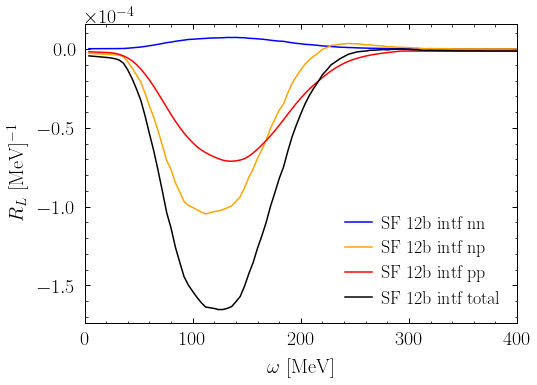

In [78]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)


#ax[0].plot(Intf_pn_jajd_df['w'], Intf_pp_jajd_df['RL'], color='red', label='SF 12b intf pp')
ax.plot(Intf_pn_jajd_df['w'], Intf_nn_jajd_df['RL'], color='blue', label='SF 12b intf nn')
ax.plot(Intf_pn_jajd_df['w'], Intf_np_jajd_df['RL'] + Intf_pn_jajd_df['RL'], color='orange', label='SF 12b intf np')
#ax[0].plot(Intf_pn_jajd_df['w'], Intf_pn_jajd_df['RL'] + Intf_pp_jajd_df['RL'] +Intf_nn_jajd_df['RL'] +Intf_np_jajd_df['RL'], color='black', label='SF 12b intf total')
ax.plot(Intf_nn_jajd_df['w'], pp_interp, color='red', label='SF 12b intf pp')
ax.plot(Intf_nn_jajd_df['w'], Intf_pn_jajd_df['RL'] + pp_interp +Intf_nn_jajd_df['RL'] +Intf_np_jajd_df['RL'], color='black', label='SF 12b intf total')




ax.set_xlim([0,400])

ax.set(ylabel=r'$R_{L}$ [MeV]$^{-1}$')
ax.set(xlabel=r"$\omega$ [MeV]")

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


ax.legend(frameon=False, prop={'size': 18})

plt.savefig('RL_q500_isospin_wjajd.png',facecolor='white',bbox_inches='tight', dpi=300)


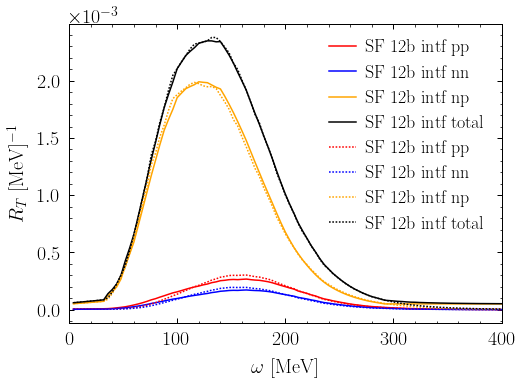

In [20]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
fig.tight_layout(pad=5.0)



ax.plot(Intf_pn_jajd_df['w'], Intf_pp_jajd_df['RT'], color='red', label='SF 12b intf pp')
ax.plot(Intf_pn_jajd_df['w'], Intf_nn_jajd_df['RT'], color='blue', label='SF 12b intf nn')
ax.plot(Intf_nn_jajd_df['w'], pn_interp + np_interp, color='orange', label='SF 12b intf np')
ax.plot(Intf_nn_jajd_df['w'], Intf_pp_jajd_df['RT'] +Intf_nn_jajd_df['RT'] + pn_interp + np_interp, color='black', label='SF 12b intf total')

#ax.plot(Intf_pn_jajd2_df['w'], Intf_pp_jajd2_df['RT'], color='red', label='SF 12b intf pp',linestyle='--')
#ax.plot(Intf_pn_jajd2_df['w'], Intf_nn_jajd2_df['RT'], color='blue', label='SF 12b intf nn',linestyle='--')
#ax.plot(Intf_nn_jajd2_df['w'], Intf_pn_jajd2_df['RT'] + Intf_np_jajd2_df['RT'], color='orange', label='SF 12b intf np',linestyle='--')
#ax.plot(Intf_nn_jajd2_df['w'], Intf_pp_jajd2_df['RT'] +Intf_nn_jajd2_df['RT'] + Intf_pn_jajd2_df['RT'] +Intf_np_jajd2_df['RT'], color='black', label='SF 12b intf total',linestyle='--')

ax.plot(Intf_pn_jajd3_df['w'], Intf_pp_jajd3_df['RT'], color='red', label='SF 12b intf pp',linestyle=':')
ax.plot(Intf_pn_jajd3_df['w'], Intf_nn_jajd3_df['RT'], color='blue', label='SF 12b intf nn',linestyle=':')
ax.plot(Intf_nn_jajd3_df['w'], Intf_pn_jajd3_df['RT'] + Intf_np_jajd3_df['RT'], color='orange', label='SF 12b intf np',linestyle=':')
ax.plot(Intf_nn_jajd3_df['w'], Intf_pp_jajd3_df['RT'] +Intf_nn_jajd3_df['RT'] + Intf_pn_jajd3_df['RT'] +Intf_np_jajd3_df['RT'], color='black', label='SF 12b intf total',linestyle=':')


ax.set_xlim([0,400])
ax.set(xlabel=r"$\omega$ [MeV]")
ax.set(ylabel=r'$R_{T}$ [MeV]$^{-1}$')

ax.legend(frameon=False, prop={'size': 18})

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.savefig('RT_q500_isospin_wjajd.png',facecolor='white',bbox_inches='tight', dpi=300)

In [16]:
path = '/Users/noah/Physics/Fermilab/Interference/EM_Responses/Isospin_Responses/'

Intf_pn_jajd_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pn_jajd.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_pp_jajd_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pp_jajd.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_nn_jajd_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_nn_jajd.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_np_jajd_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_np_jajd.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [Intf_pn_jajd_df, Intf_pp_jajd_df, Intf_nn_jajd_df, Intf_np_jajd_df]:
    df.columns = ["w", "RL", "RT"]
    
Intf_pn_jajd2_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pn_jajd2.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_pp_jajd2_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pp_jajd2.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_nn_jajd2_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_nn_jajd2.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_np_jajd2_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_np_jajd2.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [Intf_pn_jajd2_df, Intf_pp_jajd2_df, Intf_nn_jajd2_df, Intf_np_jajd2_df]:
    df.columns = ["w", "RL", "RT"]
    
Intf_pn_jajd3_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pn_jajd3.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_pp_jajd3_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_pp_jajd3.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_nn_jajd3_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_nn_jajd3.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
Intf_np_jajd3_df = pd.read_csv(path+'C12_FSI_EM_2b_SF_q500_np_jajd3.out',sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

for df in [Intf_pn_jajd3_df, Intf_pp_jajd3_df, Intf_nn_jajd3_df, Intf_np_jajd3_df]:
    df.columns = ["w", "RL", "RT"]



In [14]:
#Smooth pp[RL] and np[RT]
pp_jajd_RL_interp = [0]
pp_jajd_w_interp = [0]

pn_jajd_RT_interp = [0]
pn_jajd_w_interp = [0]

np_jajd_RT_interp = [0]
np_jajd_w_interp = [0]

interp = sm.nonparametric.lowess(Intf_pp_jajd_df['RL'][:73], Intf_pp_jajd_df['w'][:73],frac = 0.14)
pp_jajd_RL_interp = interp[:,1][:73]
pp_jajd_w_interp = interp[:,0][:73]

interp = sm.nonparametric.lowess(Intf_pn_jajd_df['RT'][:73], Intf_pn_jajd_df['w'][:73],frac = 0.1)
pn_jajd_RT_interp = interp[:,1][:73]
pn_jajd_w_interp = interp[:,0][:73]

interp = sm.nonparametric.lowess(Intf_np_jajd_df['RT'][:73], Intf_np_jajd_df['w'][:73],frac = 0.1)
np_jajd_RT_interp = interp[:,1][:73]
np_jajd_w_interp = interp[:,0][:73]

np_interp = [0]
pn_interp = [0]
pp_interp = [0]

np_interp = np.interp(Intf_nn_jajd_df['w'], np_jajd_w_interp, np_jajd_RT_interp)
pn_interp = np.interp(Intf_nn_jajd_df['w'], pn_jajd_w_interp, pn_jajd_RT_interp)
pp_interp = np.interp(Intf_nn_jajd_df['w'], pp_jajd_w_interp, pp_jajd_RL_interp)

#Now interpolate all the MEC and interf responses so that we can get everything on the same x axis bins
#for i in range(0,3):
#    MEC_interp[i] = np.interp(tmu_interp[i], MEC_df[i]['tmu'], MEC_df[i]['xsec'])
#    Intf_interp[i] = np.interp(tmu_interp[i], intf_tmu_interp[i], intf_interp_a[i])
    
